In [1]:
# Impor library yang diperlukan
import tensorflow as tf  # Library utama untuk deep learning dan pengelolaan tensor
from tensorflow import keras  # API tingkat tinggi untuk membangun model
from tensorflow.keras import layers  # Modul untuk mendefinisikan lapisan seperti Dense dan Conv2D
import numpy as np  # Library untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt  # Library untuk visualisasi data seperti grafik dan gambar
import cv2  # OpenCV untuk deteksi tepi Canny dan pengolahan citra

In [2]:
# Memuat dataset MNSIT
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()
# Memuat dataset MNSIT: 60.000 data latih penuh dan 10.000 data uji

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Membagi data menjadi training dan validation
from sklearn.model_selection import train_test_split  # Fungsi untuk membagi dataset
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
# Membagi 60.000 data menjadi 48.000 training dan 12.000 validation

In [4]:
# Fungsi untuk menerapkan deteksi tepi Canny
def apply_canny(images):
    canny_images = []  # List untuk menyimpan gambar yang telah diproses
    for img in images:  # Loop untuk setiap gambar dalam array
        img_uint8 = (img * 255).astype(np.uint8)  # Mengubah rentang 0-1 ke 0-255 dan tipe uint8 untuk OpenCV
        edges = cv2.Canny(img_uint8, 100, 200)  # Terapkan deteksi tepi Canny dengan threshold rendah 100 dan tinggi 200
        canny_images.append(edges / 255.0)  # Normalisasi kembali ke 0-1 dan tambahkan ke list
    return np.array(canny_images)  # Mengembalikan array NumPy dari gambar yang diproses


In [5]:
# Preprocessing: Normalisasi dan deteksi tepi
x_train = x_train / 255.0  # Normalisasi nilai piksel menjadi 0-1 untuk training
x_val = x_val / 255.0  # Normalisasi data validation
x_test = x_test / 255.0  # Normalisasi data uji
x_train_canny = apply_canny(x_train)  # Terapkan deteksi tepi Canny pada data training
x_val_canny = apply_canny(x_val)  # Terapkan deteksi tepi Canny pada data validation
x_test_canny = apply_canny(x_test)  # Terapkan deteksi tepi Canny pada data uji
x_train_canny = x_train_canny[..., np.newaxis]  # Menambah dimensi kanal menjadi (48000, 28, 28, 1)
x_val_canny = x_val_canny[..., np.newaxis]  # Menambah dimensi kanal menjadi (12000, 28, 28, 1)
x_test_canny = x_test_canny[..., np.newaxis]  # Menambah dimensi kanal menjadi (10000, 28, 28, 1)

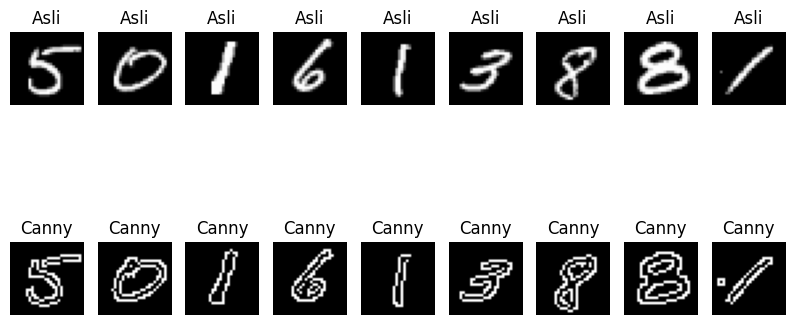

In [6]:
# Visualisasi data sebelum dan sesudah deteksi tepi
plt.figure(figsize=(10, 5))  # Membuat figure dengan ukuran 10x5 inci
for i in range(9):  # Loop untuk 9 gambar pertama
    plt.subplot(2, 9, i+1)  # Baris pertama: gambar asli
    plt.imshow(x_train[i], cmap='gray')  # Menampilkan gambar asli dalam grayscale
    plt.title("Asli")  # Judul untuk gambar asli
    plt.axis('off')  # Menghilangkan sumbu
    plt.subplot(2, 9, i+10)  # Baris kedua: gambar dengan deteksi tepi
    plt.imshow(x_train_canny[i].squeeze(), cmap='gray')  # Menampilkan gambar dengan tepi
    plt.title("Canny")  # Judul untuk gambar dengan deteksi tepi
    plt.axis('off')  # Menghilangkan sumbu
plt.show()  # Menampilkan visualisasi

In [7]:
# Membuat model CNN sederhana
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Lapisan konvolusi pertama untuk ekstraksi fitur
    layers.MaxPooling2D((2, 2)),  # Lapisan pooling untuk mengurangi dimensi
    layers.Conv2D(64, (3, 3), activation='relu'),  # Lapisan konvolusi kedua
    layers.MaxPooling2D((2, 2)),  # Lapisan pooling kedua
    layers.Flatten(),  # Meratakan output menjadi vektor
    layers.Dropout(0.5),  # Dropout untuk mencegah overfitting
    layers.Dense(128, activation='relu'),  # Lapisan fully connected
    layers.Dense(10, activation='softmax')  # Lapisan output untuk 10 kelas
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Optimizer, loss, dan metrik untuk pelatihan

In [9]:
# Melatih model dengan data yang telah diproses Canny
history = model.fit(x_train_canny, y_train,
                    epochs=10,  # Melatih selama 10 epoch
                    validation_data=(x_val_canny, y_val))  # Data validation untuk monitoring


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8641 - loss: 0.4346 - val_accuracy: 0.9760 - val_loss: 0.0719
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9721 - loss: 0.0888 - val_accuracy: 0.9839 - val_loss: 0.0522
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9801 - loss: 0.0647 - val_accuracy: 0.9852 - val_loss: 0.0477
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0505 - val_accuracy: 0.9885 - val_loss: 0.0383
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0416 - val_accuracy: 0.9884 - val_loss: 0.0388
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9881 - loss: 0.0366 - val_accuracy: 0.9883 - val_loss: 0.0396
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9882 - loss: 0.0335 - val_accuracy: 0.9895 - val_loss: 0.0392
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9903 - loss: 0.0283 -

In [10]:
# Mengevaluasi model pada data uji
test_loss, test_acc = model.evaluate(x_test_canny, y_test)
# Mengukur performa pada data uji dengan deteksi tepi
print(f'Akurasi uji: {test_acc:.4f}')  # Menampilkan akurasi uji

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0483
Akurasi uji: 0.9885


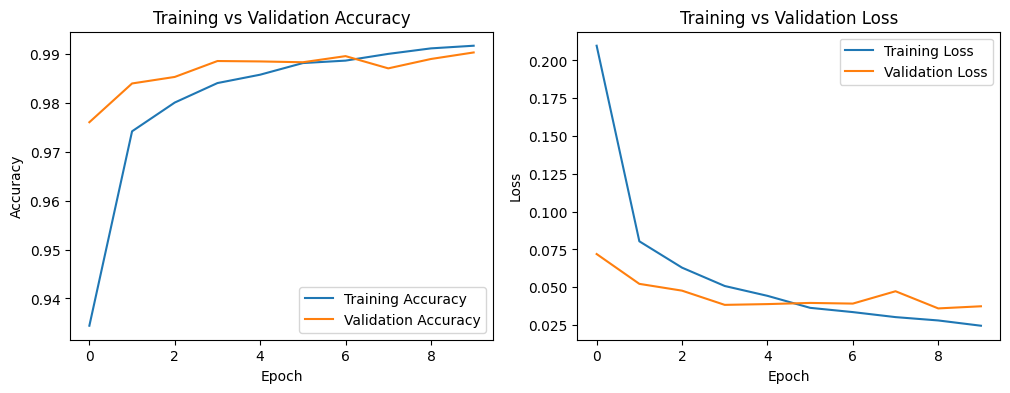

In [11]:
# Visualisasi akurasi training dan validation
plt.figure(figsize=(12, 4))  # Membuat figure dengan ukuran 12x4 inci
plt.subplot(1, 2, 1)  # Subplot pertama untuk akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot akurasi training
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot akurasi validation
plt.title('Training vs Validation Accuracy')  # Judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Accuracy')  # Label sumbu y
plt.legend()  # Menampilkan legenda
plt.subplot(1, 2, 2)  # Subplot kedua untuk loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot loss training
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot loss validation
plt.title('Training vs Validation Loss')  # Judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Loss')  # Label sumbu y
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan kedua plot